# Actividad 04: Bias-Variance Trade-off y SVM

El objetivo de esta actividad es que:

- Seas capaz de explicar el fenómeno del _Trade-off_ entre _Bias_ y _Variance_.
- Entiendas el efecto de aplicar el "truco del kernel" en un problema de clasificación usando SVM.
- Busques los mejores hiperparámetros de un modelo usando _Grid Search_.

## Parte 1 (2 pts) - Bias-Variance Trade-off

En clases vimos qué era el _trade-off_ entre _Bias_ y _Variance_. Supón que queremos hacer un modelo de regresión, en el que queremos predecir el valor de $y$ en función de un único valor $x$. Recordemos que para hacer esto, suponemos que cada dato $y_i$ distribuye de la siguiente forma:

$$
y_i = f(x_i) + \epsilon_i
$$

Es decir, hay una distribución subyacente de los datos dada por $f(x_i)$, en la que cada dato difiere $\epsilon_i$ de la función. Recordemos que la media de los $\epsilon_i$ es 0 y su varianza es $\sigma_{\epsilon}$.

En este caso, tenemos un conjunto de datos en que la distribución subyacente $f(x_i) = 3 \cdot tanh(x_i)$. Los datos se pueden ver a continuación.

Text(0, 0.5, 'y')

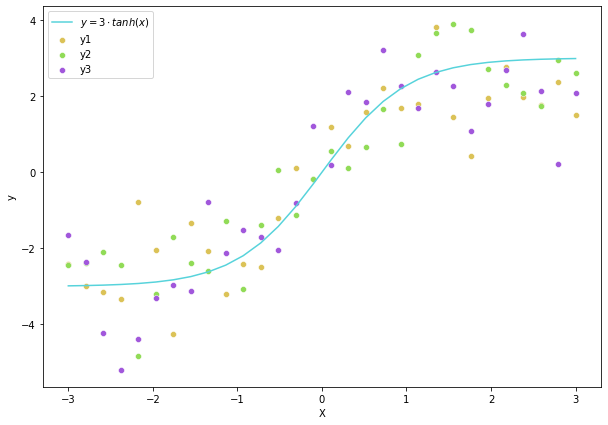

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

NUM_ELEMENTS = 30

X = np.linspace(-3, 3, NUM_ELEMENTS)
y1 = 3*np.tanh(X) + np.random.normal(0, 1, NUM_ELEMENTS)
y2 = 3*np.tanh(X) + np.random.normal(0, 1, NUM_ELEMENTS)
y3 = 3*np.tanh(X)+ np.random.normal(0, 1, NUM_ELEMENTS)

df = pd.DataFrame(
    {
        "X": X,
        "y1": y1,
        "y2": y2,
        "y3": y3,
        "tanh(X)": 3*np.tanh(X)
    }
)

plt.figure(figsize=(10, 7))
palette = sns.color_palette("hls", 8)

sns.scatterplot(data=df, x="X", y="y1", color=palette[1], label="y1")
sns.scatterplot(data=df, x="X", y="y2", color=palette[2], label="y2")
sns.scatterplot(data=df, x="X", y="y3", color=palette[6], label="y3")
sns.lineplot(data=df, x="X", y="tanh(X)", color=palette[4], label="$y=3 \cdot tanh(x)$")

plt.xlabel("X")
plt.ylabel("y")

Si calculamos el error en torno al valor $x_0$ tenemos que:

$$
Err(x_0) = \sigma_{\epsilon}^2 + Bias^2(\hat{f}(x_0)) + Variance(\hat{f}(x_0))
$$

Considera que dividimos los datos en tres subconjuntos (marcados en cada uno de los colores en el gráfico anterior). Ahora se pide que, en tus propias palabras, **respondas las siguientes preguntas**.

1. Supón que quieres probar con un modelo de regresión lineal. Explica por qué (en general) en este caso, para cada punto x_0 en el rango ($[-3,3]$) el _Bias_ va a ser bajo, pero la Varianza va a ser alta. Considera que entrenas un modelo por subconjunto de datos.

2. Supón que quieres probar con un modelo que pasa exactamente por cada punto. Explica por qué (en general) en este caso, para cada punto x_0 en el rango ($[-3,3]$) el _Bias_ va a ser bajo, pero la Varianza va a ser alta. Considera que entrenas un modelo por subconjunto de datos.

3. ¿Cuál crees que sería la mejor función $\hat{f}(x)$ para estos datos? ¿Que pasará con el _Bias_ y la Varianza en este caso?

**Contesta tu pregunta en esta celda**.

## Parte 2 (3 pts) - SVM

Considera el _dataset_ de las flores Iris. Ahora queremos predecir el tipo de flor (virginica o no) en base al largo y ancho del pétalo de la flor. Vamos a importar y graficar los datos a continuación.

<AxesSubplot:xlabel='Largo del Pétalo', ylabel='Ancho del Pétalo'>

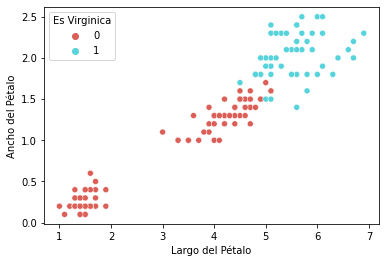

In [16]:
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns

iris = datasets.load_iris()
X = iris['data'][:, 2:] # Nos quedamos solamente con el ancho del pétalo
y = (iris['target'] == 2).astype(np.int) # Dejamos True en las filas que son Virginica

# Creamos un DataFrame con los datos
df = pd.DataFrame(X)
df.columns = ['Largo del Pétalo', 'Ancho del Pétalo']
df['Es Virginica'] = y

# Tomamos una paleta de 8 colores
palette = sns.color_palette("hls", 2)

# Pasamos el DataFrame, indicamos que queremos en cada eje, y la forma de pintar los puntos
# Los colores son los dos primeros dos de la paleta
sns.scatterplot(data=df, x="Largo del Pétalo", y="Ancho del Pétalo", hue="Es Virginica", palette=palette)

Vamos a predecir si una flor es Virginica utilizando SVM.

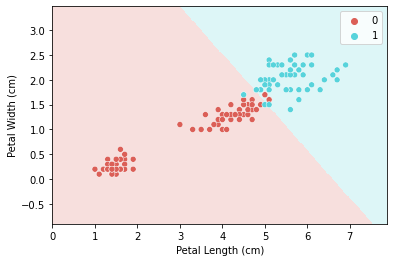

In [30]:
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

svm_clf = SVC(C=1, kernel="linear")
svm_clf.fit(X, y)

# Pasamos la paleta a Hexadecimal
# Para el fondo necesitamos que sea un Colormap
palete_hex = palette.as_hex()
palette_back = ListedColormap(palete_hex)

# Límites del gráfico
# Buscamos los límites del gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generamos las combinaciones de x/y del plano en los rangos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Generamos las predicciones
predictions = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultado de la frontera de decisión con color claro
Z = predictions.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=palette_back, shading='auto', alpha=0.2)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

sns.scatterplot(data=df, x="Largo del Pétalo", y="Ancho del Pétalo", hue="Es Virginica", palette=palette[0:2])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

En esta pregunta vamos a explorar distintos valores para los hiperparámetros del modelo SVM. Se pide que **respondas las siguientes preguntas**:

1. ¿Qué pasa con la frontera de decisión para distintos valores de C? Prueba con valores menores que 1 y mayores que 1.
2. Escoge 3 valores de C (uno de ellos debe estar entre 0 y 1) y luego utiliza el kernel `rbf`. Explica qué pasa con la frontera de decisión para distintos valores de $\gamma$.
3. Repite el procedimiento anterior, pero ahora utilizando el kernel `poly`. Explica que pasa con la frontera de decisión para distintos valores del parámetro `degree`.

Tus análisis deben estar respaldados en los gráficos de las distintas fronteras de decisión. Además discute qué puedes concluir de las distintas pruebas realizadas en esta pregunta. 

In [ ]:
# Continúa tu tarea aquí

## Parte 3 (1 pto) - GridSearch

En esta pregunta debes tomar el _dataset_ Iris, pero en vez de tomar solamente el largo y ancho del pétalo, debes tomar las 4 _features_. Además, debes ponerte en el escenario multiclase, es decir, predecir si es Setosa, Versicolor o Virginica. Divide el _dataset_ en 70\% entrenamiento y 30\% prueba. Luego con el _dataset_ de entrenamiento entrena dos modelos:

- Un modelo SVM utilizando el kernel `poly`. Aquí puedes variar los parámetros C y `degree`. 
- Un modelo SVM con el kernel `rbf`. Aquí puedes variar los parámetros C y $\gamma$.

Para los demás parámetros usa los valores por defecto. Según tu análisis de la pregunta anterior, para cada modelo prueba todas las combinaciones de 3 valores de C y 3 valores del segundo parámetro (`degree` y $\gamma$ en cada caso) **utilizando GridSearch**. Luego de encontrar los mejores hiperparámetros, entrena los dos modelos con aquellos parámetros y pruébalos sobre el _dataset_ de prueba. Comenta los resultados.

In [ ]:
# Continúa tu tarea aquí

## Detalles académicos

Esta actividad es individual. La entrega de este control debe ser mediante webcursos, y el formato es un archivo comprimido donde se encuentre un **Jupyter Notebook**, junto a cualquier archivo que estés llamando desde tu código y cualquier anexo que menciones. **La fecha de entrega es hasta el viernes 5 de noviembre, hasta las 20:00 pm**. La nota se calcula como el número de puntos + un punto base.